# 图像分割-随机游走(RandomWalker)算法

## 引言
RandomWalk是基于图论分割方法的一个重要分支。在根据图像建立的图模型上，RandomWalk根据随机游走模型，来求解未标记的像素（unseeded pixels）到达已标记的种子点（seeded pixels）的概率，根据未标记的像素到达不同目标区域的概率大小，来判断未标记像素的归属。

RandomWalk图像分割算法分为三个步骤：
- （1）图模型的建立；
- （2）根据随机游走模型计算unseeded pixels到达目标区域的线性方程组；
- （3）利用迭代法求解线性方程组，这里通常采用共轭梯度法进行求解（conjugate gradient）。

其求解过程可以用下图来描述：

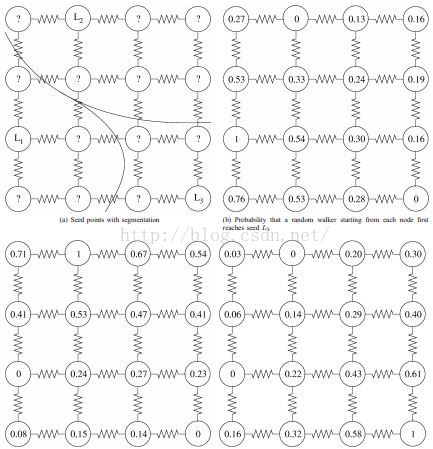

## 1 图模型的建立

这里根据图像像素与相邻像素之间的差异，建立加权图，各个边的加权值求解方法如下
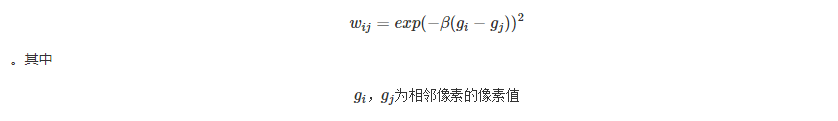

## 2 随机游走模型的建立

随机游走模型的建立，可以理解为狄利克雷积分条件的离散化。其可以使用拉普拉斯矩阵来进行描述，即对随机游走模型的求解，可以描述为如下方程的最小化求解：
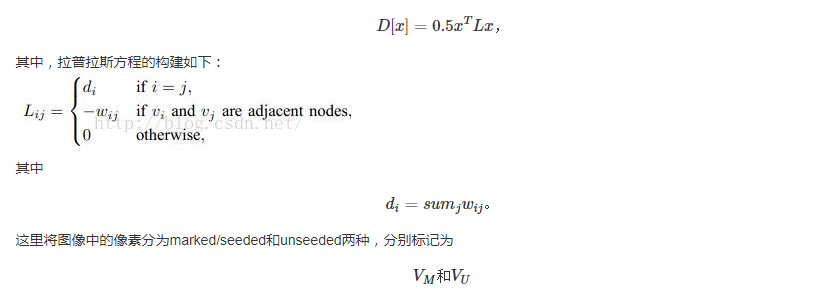

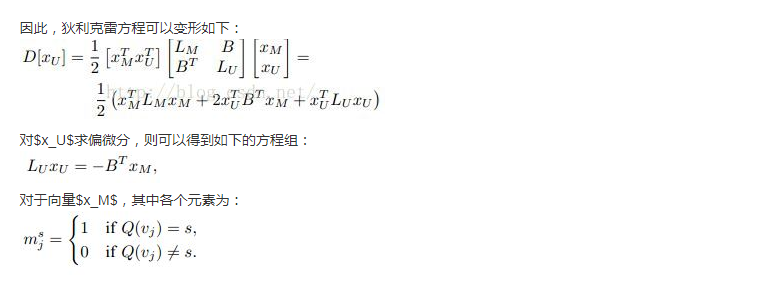

## 3 模型的求解

对上述稀疏矩阵线性方程组的求解，最长用的是共轭梯度法。这里值得注意的是由于拉普拉斯矩阵为稀疏矩阵，如果直接运算将会导致运算缓慢以及对内存的不规则调用。这里通常使用处理稀疏矩阵的第三方库来进行计算。常见的第三方库包括：方案一：直接使用CUDA

需要注意的是这里的矩阵运算是稀疏矩阵的运算，需要对稀疏矩阵进行压缩处理。

第三方提供的稀疏矩阵运算程序：http://www.mverschoor.nl/wp/projects/cuda-spmv/

CUDA官方提供的稀疏矩阵运算程序[需要CUDA7.0版本]：https://developer.nvidia.com/cuSPARSE 

方案二：OPENCL的加速方法来实现

可以使用ViennaCL进行运算。ViennaCL是使用OPENCL,OPENMP,CUDA等编写的，主要用于进行高级的矩阵运算。http://viennacl.sourceforge.net/viennacl-about.html

方案三：使用已有的加速方法来实现，例如voreen：

使用voreenBlas中的共轭梯度程序求解，其中也包括对稀疏矩阵的处理。https://github.com/bilgili/Voreen/tree/master/modules/randomwalker

方案四：其他的库，包括MKL中的DCG相关函数；GMM库等等

# 4 与图割方法的比较

 随机游走相比较于图割方法，其具有以下几点优势：
（1）对于模糊边界的求解：图割方法由于采用了最大图/最小割方法，其容易导致分割区域的收缩，因此其不适用于血管等图像的分割。对于模糊边界的求解，其可以用如下的示意图表示：

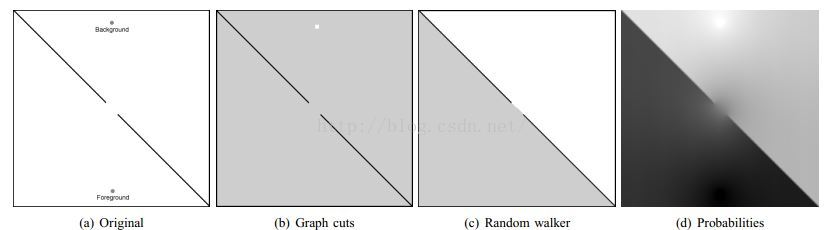

来源：

[1]. https://blog.csdn.net/menjiawan/article/details/47086423

[2]. https://blog.csdn.net/menjiawan/article/details/45313663

[3]. https://en.wikipedia.org/wiki/Random_walker_algorithm